# MP3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# read into dataframe from csv
df = pd.read_csv('./data/house-data.csv', index_col=None, na_values=['NA'])
df.shape

(21613, 21)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Cleaning tha dataframe

In [4]:
# listing all headers
list(df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
# count missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5486,2323069073,20140622T000000,439500.000,3,2.500,2050,40003,1.000,0,0,...,8,1570,480,1977,0,98027,47.470,-122.000,2700,46769
13398,7202290620,20150219T000000,461000.000,3,2.500,1690,3026,2.000,0,0,...,7,1690,0,2002,0,98053,47.688,-122.043,1650,3161
20235,3303700221,20140627T000000,735000.000,3,2.250,1490,1212,2.000,0,0,...,9,1040,450,2011,0,98112,47.623,-122.313,1490,1337


### Drop unnecessary columns

In [10]:
df = df.drop(['id', 'date', 'zipcode', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_basement'], axis=1)

In [11]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,1955,47.511,-122.257
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,1951,47.721,-122.319
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,1933,47.738,-122.233
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,1965,47.521,-122.393
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,1987,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,2009,47.699,-122.346
21609,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,2014,47.511,-122.362
21610,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,2009,47.594,-122.299
21611,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,2004,47.535,-122.069


### Turn weirdly continuus values into nominal values

In [12]:
df['bathrooms'] = df['bathrooms'].apply(np.floor).astype(int)
df['floors'] = df['floors'].apply(np.floor).astype(int)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long
0,221900.000,3,1,1180,5650,1,0,0,3,7,1180,1955,47.511,-122.257
1,538000.000,3,2,2570,7242,2,0,0,3,7,2170,1951,47.721,-122.319
2,180000.000,2,1,770,10000,1,0,0,3,6,770,1933,47.738,-122.233
3,604000.000,4,3,1960,5000,1,0,0,5,7,1050,1965,47.521,-122.393
4,510000.000,3,2,1680,8080,1,0,0,3,8,1680,1987,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2,1530,1131,3,0,0,3,8,1530,2009,47.699,-122.346
21609,400000.000,4,2,2310,5813,2,0,0,3,8,2310,2014,47.511,-122.362
21610,402101.000,2,0,1020,1350,2,0,0,3,7,1020,2009,47.594,-122.299
21611,400000.000,3,2,1600,2388,2,0,0,3,8,1600,2004,47.535,-122.069


### Dealing with outliers

<Axes: >

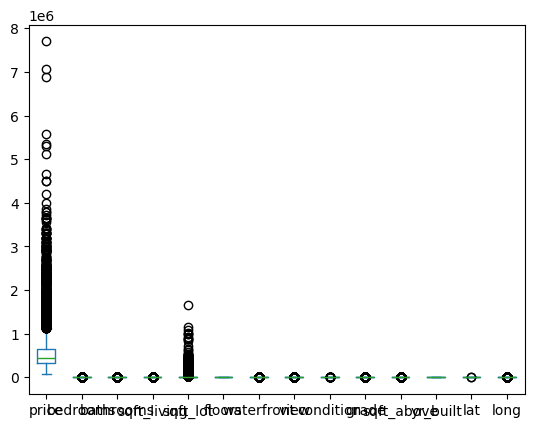

In [13]:
df.plot.box()

<Axes: >

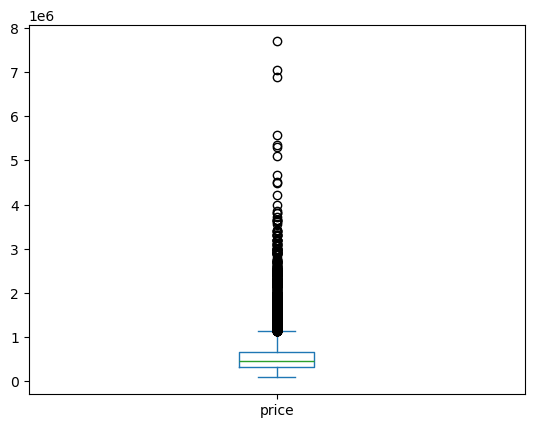

In [14]:
df.price.plot.box()

<Axes: ylabel='Density'>

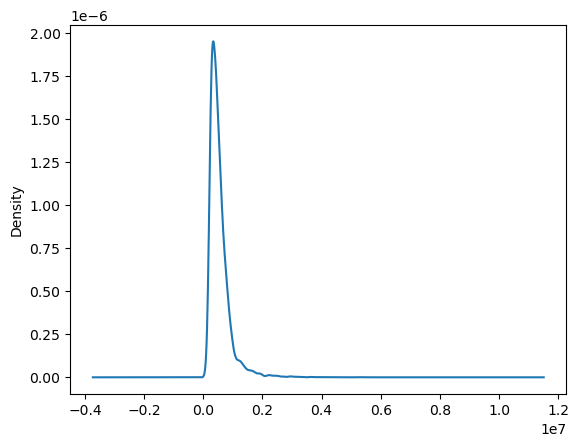

In [15]:
df.price.plot.density()

In [16]:
factor = 1.2
upper_lim = df['price'].mean () + df['price'].std () * factor
lower_lim = df['price'].mean () - df['price'].std () * factor

no_outliers = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

outliers = df[(df['price'] > upper_lim) | (df['price'] < lower_lim)]
df = no_outliers
outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long
5,1225000.000,4,4,5420,101930,1,0,0,3,11,3890,2001,47.656,-122.005
21,2000000.000,3,2,3050,44867,1,0,4,3,9,2330,1968,47.532,-122.233
49,1350000.000,3,2,2753,65005,1,1,2,5,9,2165,1953,47.404,-122.451
69,1325000.000,5,2,3200,20158,1,0,0,3,8,1600,1965,47.630,-122.215
70,1040000.000,5,3,4770,50094,1,0,0,4,11,3070,1973,47.653,-122.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,1222500.000,4,3,4910,9444,1,0,0,3,11,3110,2007,47.650,-122.066
21593,1088000.000,5,3,4170,8142,2,0,2,3,10,4170,2006,47.535,-122.181
21597,1575000.000,4,3,3410,10125,2,0,0,3,10,3410,2007,47.565,-122.223
21600,1537000.000,5,3,4470,8088,2,0,0,3,11,4470,2008,47.632,-122.200


In [17]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long
0,221900.000,3,1,1180,5650,1,0,0,3,7,1180,1955,47.511,-122.257
1,538000.000,3,2,2570,7242,2,0,0,3,7,2170,1951,47.721,-122.319
2,180000.000,2,1,770,10000,1,0,0,3,6,770,1933,47.738,-122.233
3,604000.000,4,3,1960,5000,1,0,0,5,7,1050,1965,47.521,-122.393
4,510000.000,3,2,1680,8080,1,0,0,3,8,1680,1987,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2,1530,1131,3,0,0,3,8,1530,2009,47.699,-122.346
21609,400000.000,4,2,2310,5813,2,0,0,3,8,2310,2014,47.511,-122.362
21610,402101.000,2,0,1020,1350,2,0,0,3,7,1020,2009,47.594,-122.299
21611,400000.000,3,2,1600,2388,2,0,0,3,8,1600,2004,47.535,-122.069


<Axes: ylabel='Density'>

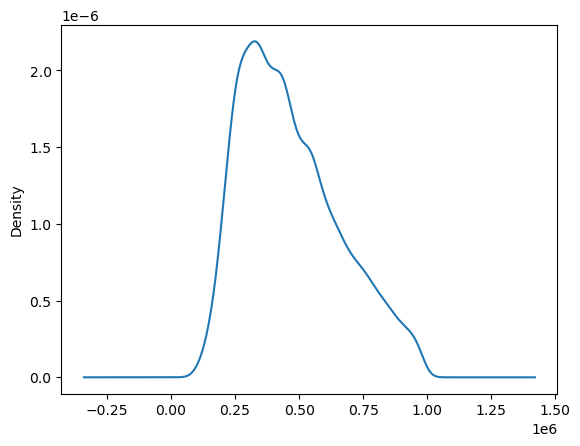

In [18]:
df.price.plot.density()

<Axes: >

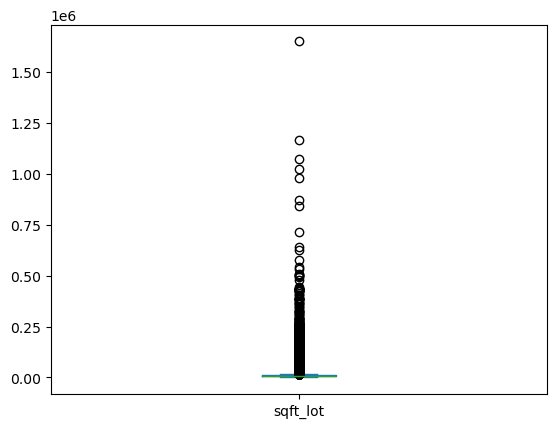

In [19]:
df.sqft_lot.plot.box()

<Axes: >

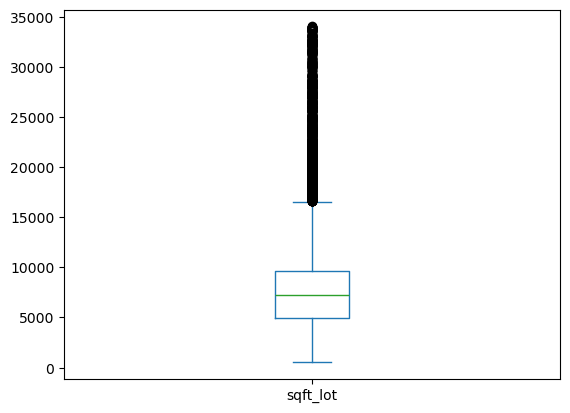

In [20]:
factor = 0.5
upper_lim = df['sqft_lot'].mean () + df['sqft_lot'].std () * factor
lower_lim = df['sqft_lot'].mean () - df['sqft_lot'].std () * factor

no_outliers = df[(df['sqft_lot'] < upper_lim) & (df['sqft_lot'] > lower_lim)]
no_outliers.sqft_lot.plot.box()

In [21]:
df = no_outliers.reset_index()
df

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long
0,0,221900.000,3,1,1180,5650,1,0,0,3,7,1180,1955,47.511,-122.257
1,1,538000.000,3,2,2570,7242,2,0,0,3,7,2170,1951,47.721,-122.319
2,2,180000.000,2,1,770,10000,1,0,0,3,6,770,1933,47.738,-122.233
3,3,604000.000,4,3,1960,5000,1,0,0,5,7,1050,1965,47.521,-122.393
4,4,510000.000,3,2,1680,8080,1,0,0,3,8,1680,1987,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18653,21608,360000.000,3,2,1530,1131,3,0,0,3,8,1530,2009,47.699,-122.346
18654,21609,400000.000,4,2,2310,5813,2,0,0,3,8,2310,2014,47.511,-122.362
18655,21610,402101.000,2,0,1020,1350,2,0,0,3,7,1020,2009,47.594,-122.299
18656,21611,400000.000,3,2,1600,2388,2,0,0,3,8,1600,2004,47.535,-122.069


<Axes: >

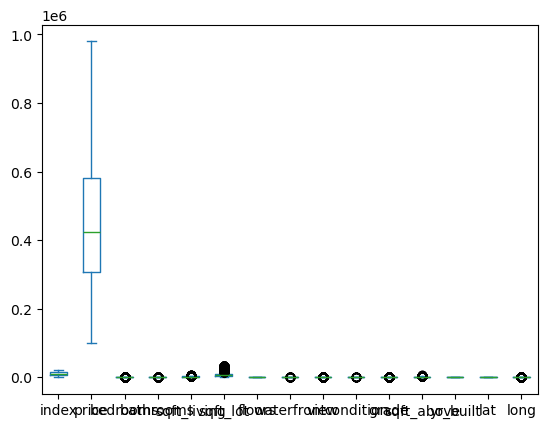

In [22]:
df.plot.box()

## Data exploration

### Check the distribution

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'yr_built'}>]], dtype=object)

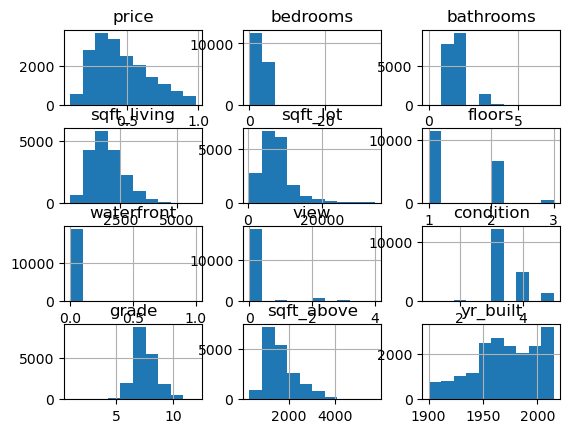

In [23]:
df = df.drop(['lat', 'long', 'index'], axis=1)
df.hist()

It seems that a lot of the features follows a kind of normal distribution.

Lets se if we can find some correlations

In [24]:
corr_matrix = df.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built
price,1.000,0.280,0.366,0.583,0.017,0.228,0.048,0.222,0.036,0.594,0.483,0.032
bedrooms,0.280,1.000,0.428,0.600,0.156,0.121,-0.029,0.036,0.024,0.309,0.470,0.160
bathrooms,0.366,0.428,1.000,0.614,-0.019,0.491,-0.019,0.063,-0.150,0.512,0.557,0.475
sqft_living,0.583,0.600,0.614,1.000,0.232,0.332,-0.004,0.156,-0.078,0.676,0.841,0.350
sqft_lot,0.017,0.156,-0.019,0.232,1.000,-0.232,0.077,0.084,0.089,0.093,0.195,-0.026
floors,0.228,0.121,0.491,0.332,-0.232,1.000,-0.007,-0.019,-0.316,0.479,0.527,0.615
waterfront,0.048,-0.029,-0.019,-0.004,0.077,-0.007,1.000,0.293,0.014,-0.014,-0.014,-0.040
view,0.222,0.036,0.063,0.156,0.084,-0.019,0.293,1.000,0.025,0.123,0.052,-0.073
condition,0.036,0.024,-0.150,-0.078,0.089,-0.316,0.014,0.025,1.000,-0.182,-0.188,-0.357
grade,0.594,0.309,0.512,0.676,0.093,0.479,-0.014,0.123,-0.182,1.000,0.682,0.498


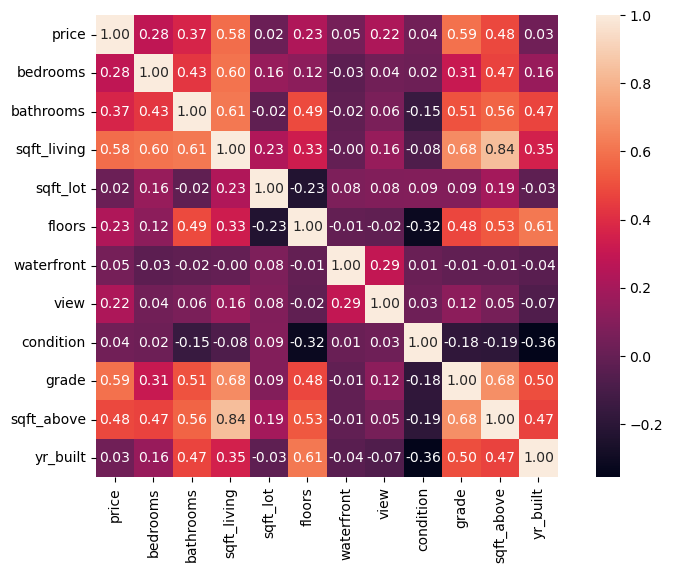

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, square=True, fmt=".2f")
plt.show()

When looking at price we can see that the higest correlations is grade with 0.59 and the smallest is sqft_lot with only 0.02 which means there is almost not any correlation between the two.

We can also see that the price correlates highly with square foot living space, the grade of the house, and to a lesser extent the amount of bathrooms in the house.

In [26]:
corr_matrix['price']

price         1.000
bedrooms      0.280
bathrooms     0.366
sqft_living   0.583
sqft_lot      0.017
floors        0.228
waterfront    0.048
view          0.222
condition     0.036
grade         0.594
sqft_above    0.483
yr_built      0.032
Name: price, dtype: float64

Least informative attributes, potentiale for removal, if the model is inaccurate:

* sqft_lot (0.017)
* yr_built (0.032)
* condition (0.036)
* waterfront (0.048)

### Training a linear regression model

In [27]:
X = df['grade'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

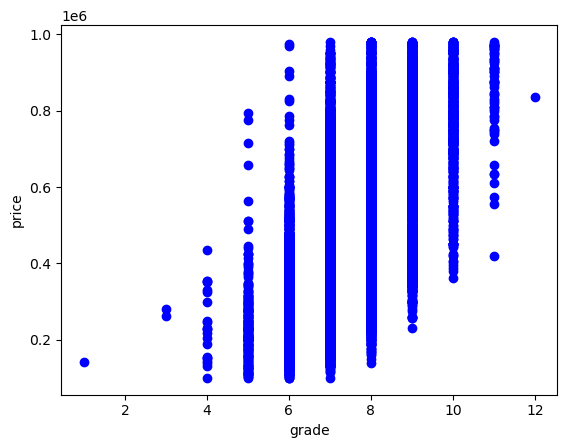

In [28]:
# Scatter plot for grade & price:
plt.ylabel('price')
plt.xlabel('grade')
plt.scatter(X, y, color='blue')
plt.show()

In [29]:
# random_state (kwargs, att.) = We set to 123, so we get the same split of data every time, wich makes it easier
# for debugging and testing, because it allows you to get consistent results when you 
# run the code multiple times 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25) 

In [30]:
# The shape of each subsets (train & test):
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13993, 1)
(13993, 1)
(4665, 1)
(4665, 1)


In [31]:
# Instance of linear regression:
myreg = LinearRegression()

In [32]:
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [33]:
a = myreg.coef_
b = myreg.intercept_

print(f'coef: {a}')
print(f'intercept: {b}')

coef: [[117144.18448347]]
intercept: [-416765.93878036]


In [34]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[520387.53708741],
       [403243.35260394],
       [403243.35260394],
       ...,
       [286099.16812047],
       [520387.53708741],
       [520387.53708741]])

In [35]:
y_test

array([[555000.],
       [246000.],
       [427500.],
       ...,
       [122000.],
       [660000.],
       [477000.]])

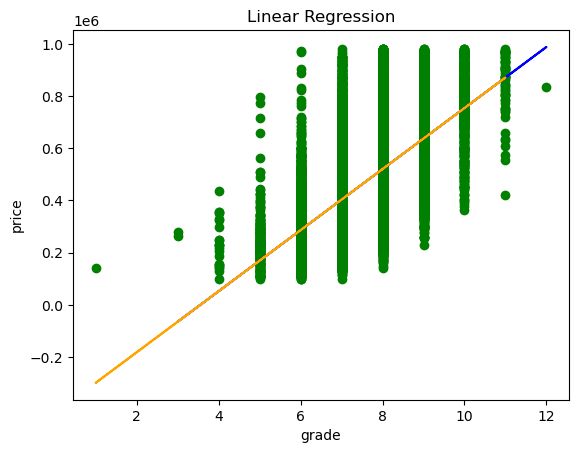

In [36]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

In [37]:
R2 = myreg.score(X, y)
R2

0.3529254568466028

In [38]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

123480.24848600553
23936993192.575665
154715.84661105555


It seems that the data is not fit to do linear regression, when tryed on each cols (x) at a time compared to price (y),
the higgest accuracy is 35.29% between grade and price.

### Training a multiple linear regression model

In [39]:
x_params = df.columns[1:]

In [40]:
X = df[x_params]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built
0,3,1,1180,5650,1,0,0,3,7,1180,1955
1,3,2,2570,7242,2,0,0,3,7,2170,1951
2,2,1,770,10000,1,0,0,3,6,770,1933
3,4,3,1960,5000,1,0,0,5,7,1050,1965
4,3,2,1680,8080,1,0,0,3,8,1680,1987
...,...,...,...,...,...,...,...,...,...,...,...
18653,3,2,1530,1131,3,0,0,3,8,1530,2009
18654,4,2,2310,5813,2,0,0,3,8,2310,2014
18655,2,0,1020,1350,2,0,0,3,7,1020,2009
18656,3,2,1600,2388,2,0,0,3,8,1600,2004


In [41]:
y = df['price']
y

0       221900.000
1       538000.000
2       180000.000
3       604000.000
4       510000.000
           ...    
18653   360000.000
18654   400000.000
18655   402101.000
18656   400000.000
18657   325000.000
Name: price, Length: 18658, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [43]:
print(X_train.shape)

(13993, 11)


In [44]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [45]:
list(zip(x_params, linreg.coef_))

[('bedrooms', -13449.068969804022),
 ('bathrooms', 13872.321363201898),
 ('sqft_living', 105.95518226761033),
 ('sqft_lot', -4.116878386548706),
 ('floors', 31954.490561986473),
 ('waterfront', 119658.32432772161),
 ('view', 21325.97201133828),
 ('condition', 17276.202167699732),
 ('grade', 99902.67162306112),
 ('sqft_above', -10.253757425380172),
 ('yr_built', -2484.61466825831)]

### Testing model

In [46]:
y_test

6279    525000.000
12764   290000.000
10893   800000.000
9173    288000.000
9251    287000.000
           ...    
11227   395000.000
8389    505000.000
1555    225000.000
14767   367500.000
3461    825050.000
Name: price, Length: 4665, dtype: float64

In [47]:
y_predicted = linreg.predict(X_test)

In [48]:
y_predicted

array([552293.60839011, 583495.94529769, 723236.58527038, ...,
       225278.85303773, 329341.35367754, 856764.80713979])

MSE test

In [49]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

128412.25972493703


R-squared test

In [50]:
eV = round(metrics.explained_variance_score(y_test, y_predicted), 6)
print('Explained variance score', eV)

Explained variance score 0.545201


In [51]:
metrics.r2_score(y_test, y_predicted)

0.545176894734812

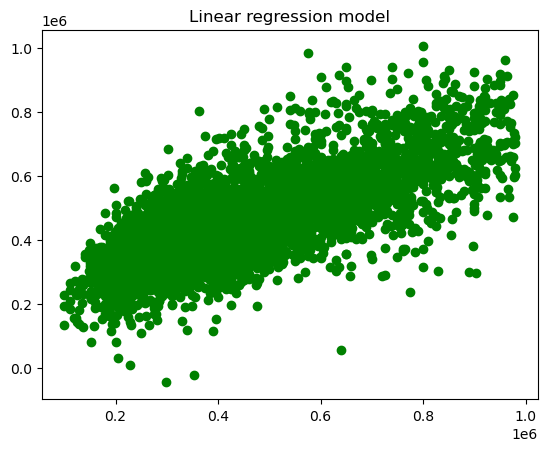

In [52]:
plt.title('Linear regression model')
plt.scatter(y_test, y_predicted, color='green')
plt.show()

### Let's try to make the model better
By Focusing of the features that have the highest correlation with price

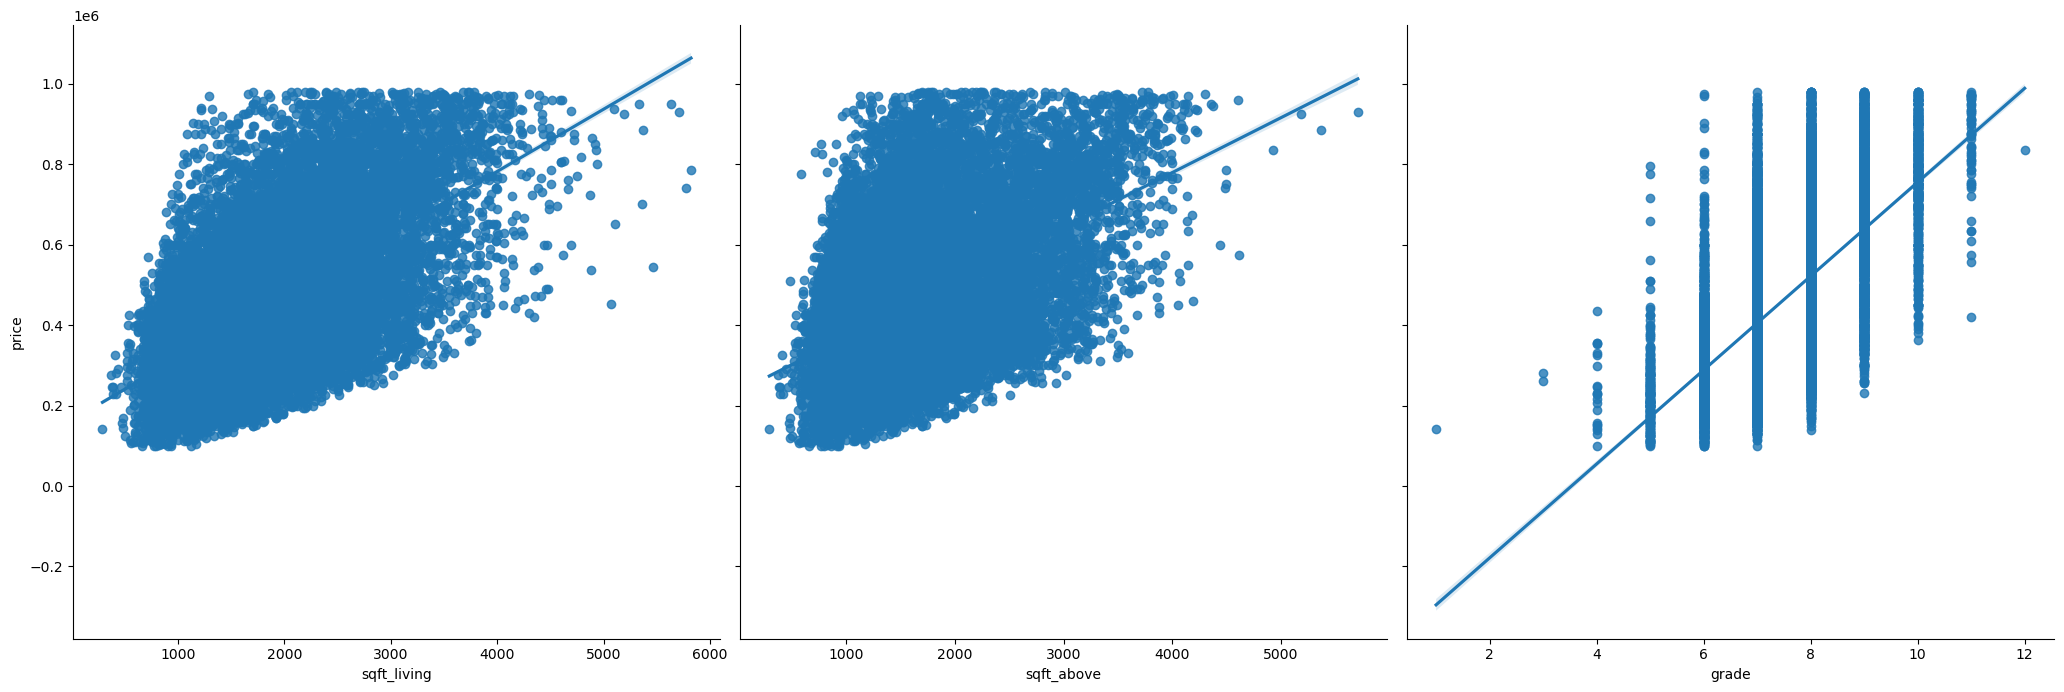

In [53]:
x_params = ['sqft_living', 'sqft_above', 'grade']
sns.pairplot(df, x_vars=x_params, y_vars='price', height=7, kind='reg')

In [54]:
X = df[x_params]
X

,sqft_living,sqft_above,grade
0,1180,1180,7
1,2570,2170,7
2,770,770,6
3,1960,1050,7
4,1680,1680,8
...,...,...,...
18653,1530,1530,8
18654,2310,2310,8
18655,1020,1020,7
18656,1600,1600,8


In [55]:
y = df['price']
y

0       221900.000
1       538000.000
2       180000.000
3       604000.000
4       510000.000
           ...    
18653   360000.000
18654   400000.000
18655   402101.000
18656   400000.000
18657   325000.000
Name: price, Length: 18658, dtype: float64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [57]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [58]:
y_predicted = linreg.predict(X_test)

In [59]:
eV = round(metrics.explained_variance_score(y_test, y_predicted), 6)
print('Explained variance score', eV)

Explained variance score 0.418228


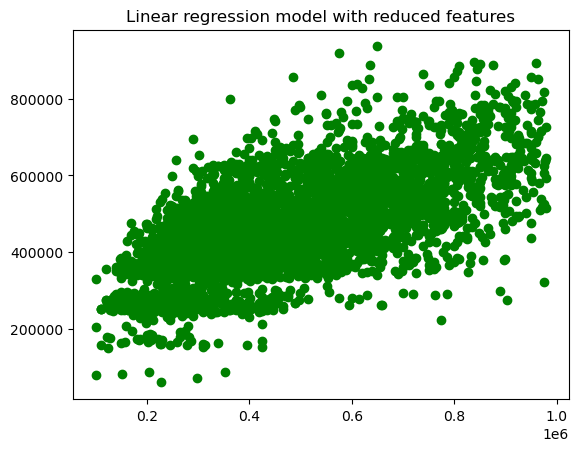

In [60]:
plt.title('Linear regression model with reduced features')
plt.scatter(y_test, y_predicted, color='green')
plt.show()

Hmm that did not seem to help the accuracy of the model. Ithas been reduced around 13% since the reduction of features.
We'll try only removing features which have very low correlation wih price

In [61]:
x_params = ['sqft_living', 'sqft_above', 'grade', 'bedrooms', 'bathrooms', 'floors', 'view']
X = df[x_params]
X

,sqft_living,sqft_above,grade,bedrooms,bathrooms,floors,view
0,1180,1180,7,3,1,1,0
1,2570,2170,7,3,2,2,0
2,770,770,6,2,1,1,0
3,1960,1050,7,4,3,1,0
4,1680,1680,8,3,2,1,0
...,...,...,...,...,...,...,...
18653,1530,1530,8,3,2,3,0
18654,2310,2310,8,4,2,2,0
18655,1020,1020,7,2,0,2,0
18656,1600,1600,8,3,2,2,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [63]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [64]:
y_predicted = linreg.predict(X_test)

In [65]:
eV = round(metrics.explained_variance_score(y_test, y_predicted), 6)
print('Explained variance score', eV)

Explained variance score 0.433956


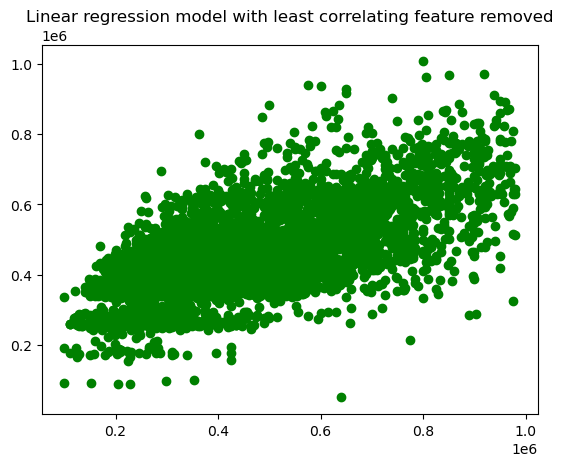

In [66]:
plt.title('Linear regression model with least correlating feature removed')
plt.scatter(y_test, y_predicted, color='green')
plt.show()

Looks like a linear regression model works best with all features!

### Polynomial model

In [67]:
# X_params = df.columns[1:]
# X = df[x_params]
# X

In [68]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
y

array([1, 2, 1, ..., 0, 2, 0])

In [69]:
poly_model = PolynomialFeatures(degree=5)
X_poly = poly_model.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [70]:
y_predict = pol_reg.predict(X_poly)

In [71]:
def viz_polymonial():
    plt.scatter(X_poly, y, color='red')
    plt.plot(X_poly, y_predict , color='blue')
    plt.title('Polynomia Regression)')
    plt.xlabel('Features')
    plt.ylabel('Price')
    plt.show()
    return

ValueError: x and y must be the same size

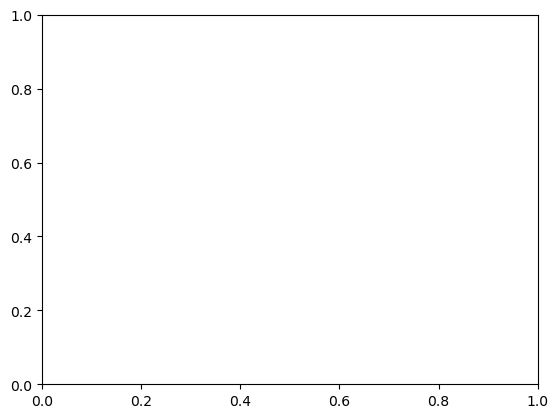

In [72]:
viz_polymonial()